# Random Walk
You and your friend place a friendly wager, if you can get to the 60th step of a the office bulding across the street, he will wash your car; if you lose then you have to wash your friends car. The ***catch*** being, that the roll of a die will determine whether you take one step up, or one step down, and that you only have 100 rolls.

If you roll a 3,4 or 5 then you can take a step up; if you roll anything else, a 1, 2 or a 6, then you have to take a step down.

Problem:
You don't want to waste a bet, if you accept a challenge that has little to no chance of you succedding, you now have to wash your friends car. What is the probability of you reaching step number 60 in one go?

But, if you are the one issuing the challenge, should you use a die or flip a coin to determine the direction of the step? What improves your odds of success?

## Approach
I will simulate rolling the die and plot the distribution of the randomly generated rolls. 

# Packages
1. Numpy 
2. Random - numpy subpackage
2. Matplotlib

In [1]:
import numpy as np
import matplotlib as plt

In [5]:
# Setting the seed for reproducibility
np.random.seed(456)
np.random.rand()

# simulate a die
np.random.randint(1,7)

4

In [18]:
random_walk = [0]

for x in range(100):
    dice = np.random.randint(1,7)
    
    step = random_walk[-1]

    
    if dice <= 2:
#         Lets not get into negative floors, so I will just make sure the lowest we can go is the first floor
        step = max(0, step -1)
    elif dice <= 5:
        step += 1
    else:
        step += np.random.randint(1,7)

    random_walk.append(step)
    
print(random_walk)

[0, 1, 0, 0, 1, 0, 1, 6, 5, 6, 7, 6, 5, 6, 7, 8, 9, 10, 11, 12, 18, 21, 20, 21, 22, 23, 24, 25, 31, 30, 29, 30, 31, 30, 31, 32, 35, 36, 37, 38, 39, 41, 40, 43, 44, 43, 48, 49, 48, 49, 48, 49, 50, 49, 48, 51, 52, 56, 55, 54, 55, 54, 55, 56, 55, 56, 61, 62, 63, 64, 63, 62, 63, 64, 65, 66, 67, 68, 69, 68, 69, 70, 69, 68, 69, 68, 67, 66, 65, 64, 65, 66, 65, 66, 65, 66, 67, 68, 71, 73, 72]


Alright, let's now look to visualize the distributions.

In [22]:
import matplotlib.pyplot as plt

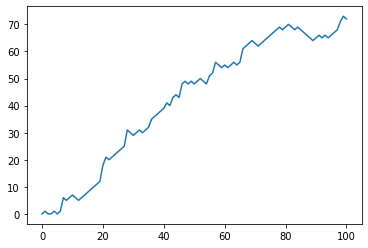

In [23]:
plt.plot(random_walk)
plt.show()

*Well*, would you look at that? Easy money right? 

Let's tighten this up a bit. Running one simulation doesn't give us the best idea.

[0, 1, 2, 8, 9, 10, 15, 16, 17, 18, 22, 27, 26, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 35, 34, 35, 34, 35, 36, 37, 38, 37, 38, 41, 42, 43, 48, 47, 48, 47, 48, 49, 48, 47, 48, 49, 50, 49, 50, 49, 48, 49, 50, 49, 50, 51, 56, 58, 59, 60, 61, 62, 63, 64, 70, 69, 68, 67, 69, 68, 69, 72, 73, 74, 75, 76, 75, 76, 75, 76, 75, 74, 73, 72, 73, 74, 73, 77, 76, 77, 76, 81, 80, 79, 78, 77, 78, 77, 76, 77]


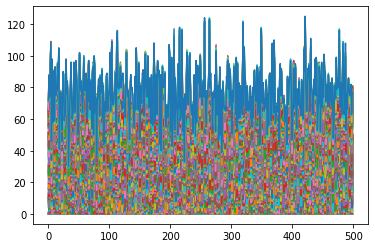

In [38]:
all_walks = []

for i in range(500):
    random_walk =[0]
    for x in range(100):            
        step = random_walk[-1]
        dice = np.random.randint(1,7)


        if dice <= 2:
            step = max(0, step -1)
        elif dice <= 5:
            step += 1
        else:
            step += np.random.randint(1,7)

        random_walk.append(step)
    all_walks.append(random_walk)
print(random_walk)

np_walk = np.array(all_walks)

plt.plot(np_walk)
plt.show()

Hmm, not very tight. It doesn't like that good. I will need to turn all_walks, from a list of lists to a numpy array.

[0, 0, 6, 7, 6, 7, 8, 9, 8, 9, 8, 10, 9, 10, 12, 18, 17, 18, 19, 18, 19, 20, 19, 20, 21, 20, 21, 20, 19, 18, 19, 24, 25, 26, 25, 26, 32, 31, 33, 34, 35, 36, 37, 36, 37, 40, 39, 40, 39, 40, 41, 40, 41, 42, 41, 42, 41, 40, 43, 44, 45, 46, 47, 46, 50, 51, 52, 51, 52, 54, 55, 56, 57, 58, 57, 56, 55, 54, 53, 54, 53, 52, 57, 58, 59, 64, 65, 66, 68, 67, 68, 67, 68, 69, 68, 67, 68, 69, 70, 71, 75]


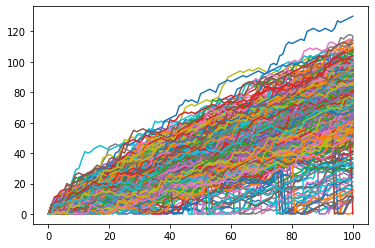

In [60]:
all_walks = []

for i in range(500):
    random_walk =[0]
    for x in range(100):    
        
        step = random_walk[-1]
        dice = np.random.randint(1,7)


        if dice <= 2:
            step = max(0, step -1)
        elif dice <= 5:
            step += 1
        else:
            step += np.random.randint(1,7)
            
        #include a black swan event, say you slip and fall 
        if np.random.rand() <= 0.001 :
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)
print(random_walk)

np_walk = np.transpose(np.array(all_walks))

plt.plot(np_walk)
plt.show()


So I can make a nice chart, but what can we derive from this? Should you take the bet?

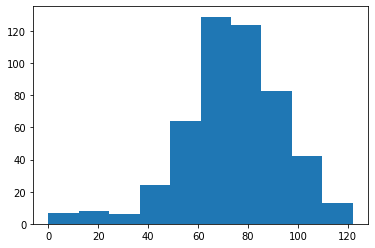

In [51]:
all_walks = []

for i in range(500):
    random_walk =[0]
    for x in range(100):    
        
        step = random_walk[-1]
        dice = np.random.randint(1,7)


        if dice <= 2:
            step = max(0, step -1)
        elif dice <= 5:
            step += 1
        else:
            step += np.random.randint(1,7)
        
        #you slipped
        if np.random.rand() <= 0.001:
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

np_walk = np.transpose(np.array(all_walks))

ends = np_walk[-1,:]

plt.hist(ends)
plt.show()


In [52]:
np.mean(ends >= 60)

0.796

We have a very high likely-hood that you can reach step 60 of the building. I would take the bet. As tempting as it is to raise the stakes, say by betting with cash instead of a car wash, the confidence you would show would probably cause your friend to pull the deal.  

Let's see if there's any chance if your friend switches the die for a coin.

[0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 10, 11, 12, 11, 12, 13, 14, 13, 14, 13, 12, 13, 12, 11, 12, 11, 12, 13, 14, 15, 16, 17, 16, 17, 16, 17, 18, 19, 18, 19, 18, 17, 16, 15, 14, 13, 12, 13, 12, 13, 12, 13, 14, 13, 14, 13, 14, 13, 12, 11, 10, 9, 10, 11, 12, 11, 10, 9, 8, 9, 8, 7, 8, 9, 8, 9, 10, 9, 8, 9, 8, 7, 8, 9, 8]


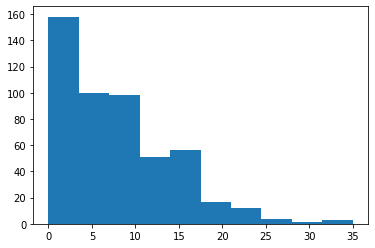

0.0

In [59]:
all_walks = []

for i in range(500):
    random_walk =[0]
    for x in range(100):    
        
        step = random_walk[-1]
        #heads will be 0, tails will be 1
        coin = np.random.randint(0,2)


        if coin == 0:
            step = max(0, step -1)
        else:
            step += 1
            
        #include a black swan event, say you slip and fall 
        if np.random.rand() <= 0.001 :
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)
print(random_walk)

np_walk = np.transpose(np.array(all_walks))

ends = np_walk[-1,:]

plt.hist(ends)
plt.show()

np.mean(ends >= 60)


You could have guess that switching from a die to a coin, would dramatically lower your chances.
